<a href="https://colab.research.google.com/github/Rohini0106-ui/Bioinformatics-/blob/main/AI_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Data:
          Sample_1   Sample_2   Sample_3   Sample_4   Sample_5
Gene_1  37.454012  95.071431  73.199394  59.865848  15.601864
Gene_2  15.599452   5.808361  86.617615  60.111501  70.807258
Gene_3   2.058449  96.990985  83.244264  21.233911  18.182497
Gene_4  18.340451  30.424224  52.475643  43.194502  29.122914
Gene_5  61.185289  13.949386  29.214465  36.636184  45.606998

Filtered Data:
          Sample_1   Sample_2   Sample_3   Sample_4   Sample_5
Gene_1  37.454012  95.071431  73.199394  59.865848  15.601864
Gene_7  60.754485  17.052412   6.505159  94.888554  96.563203

Normalized Data:
         Sample_1  Sample_2  Sample_3  Sample_4  Sample_5
Gene_1 -0.707107  0.707107  0.707107 -0.707107 -0.707107
Gene_7  0.707107 -0.707107 -0.707107  0.707107  0.707107


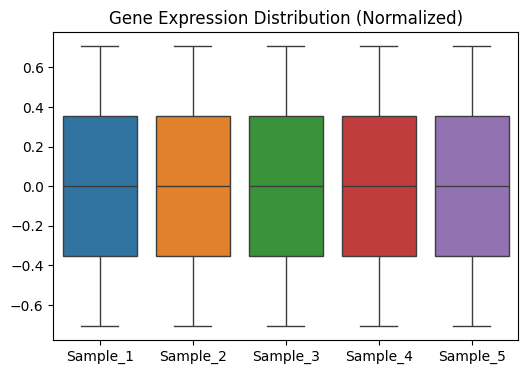

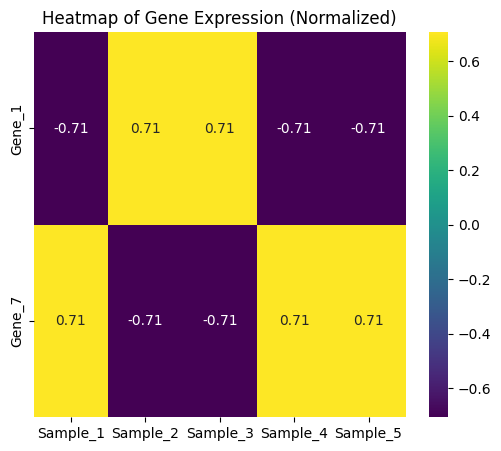

In [ ]:
# gene_expression_analysis.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a mock gene expression dataset
np.random.seed(42)
genes = [f"Gene_{i}" for i in range(1, 11)]
samples = [f"Sample_{i}" for i in range(1, 6)]

data = np.random.rand(10, 5) * 100  # random expression values
df = pd.DataFrame(data, index=genes, columns=samples)

print("Original Data:\n", df.head())

# --- Basic Data Manipulation ---
# Filtering: keep genes with mean expression > 50
filtered_df = df[df.mean(axis=1) > 50]
print("\nFiltered Data:\n", filtered_df)

# Normalization: Z-score normalization
normalized_df = (filtered_df - filtered_df.mean()) / filtered_df.std()
print("\nNormalized Data:\n", normalized_df)

# --- Visualization ---
# Boxplot to show expression distribution
plt.figure(figsize=(6,4))
sns.boxplot(data=normalized_df)
plt.title("Gene Expression Distribution (Normalized)")
plt.show()

# Heatmap for gene expression
plt.figure(figsize=(6,5))
sns.heatmap(normalized_df, cmap="viridis", annot=True)
plt.title("Heatmap of Gene Expression (Normalized)")
plt.show()


Explained variance ratio by PCA: [0.01032675 0.01001881]


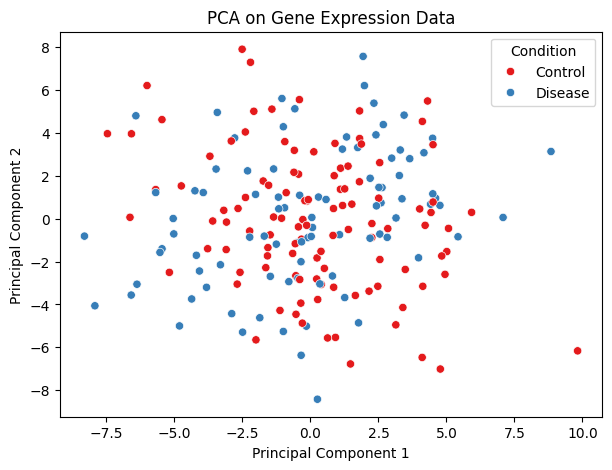

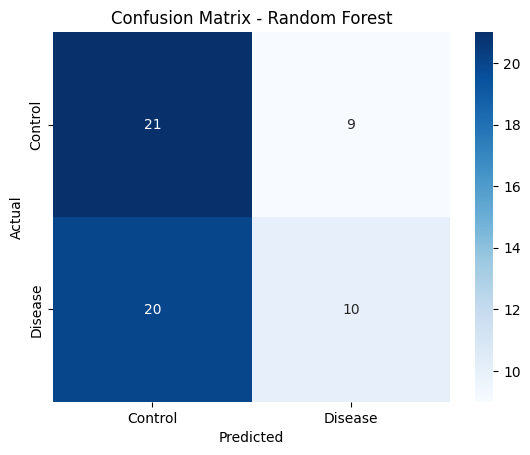


Classification Report:
               precision    recall  f1-score   support

     Control       0.51      0.70      0.59        30
     Disease       0.53      0.33      0.41        30

    accuracy                           0.52        60
   macro avg       0.52      0.52      0.50        60
weighted avg       0.52      0.52      0.50        60



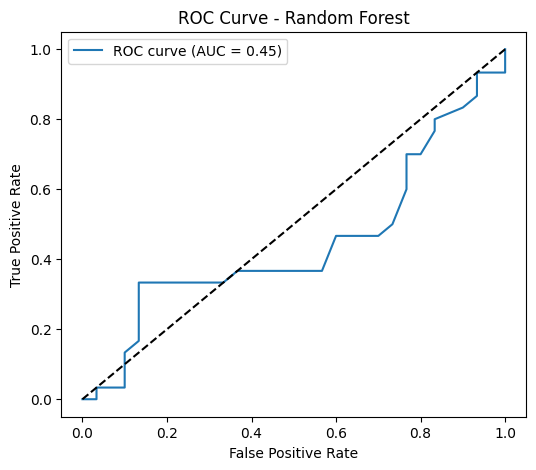


Best Parameters from Grid Search:
 {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}

Classification Report (After Tuning):
               precision    recall  f1-score   support

     Control       0.52      0.73      0.61        30
     Disease       0.56      0.33      0.42        30

    accuracy                           0.53        60
   macro avg       0.54      0.53      0.51        60
weighted avg       0.54      0.53      0.51        60

Accuracy Before Tuning: 0.52
Accuracy After Tuning: 0.53


In [ ]:
 MACHINE LEARNING IN BIOINFORMATICS

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay

 #1: DATA CLEANING & FEATURE ENGINEERING

# Generate synthetic gene expression dataset
np.random.seed(42)
n_samples = 200
n_genes = 1000

# Simulate expression values
X = np.random.rand(n_samples, n_genes) * 100

# Introduce some missing values randomly
mask = np.random.rand(*X.shape) < 0.05
X[mask] = np.nan

# Create target variable (disease vs control)
y = np.random.choice(['Disease', 'Control'], size=n_samples)

# Convert to DataFrame
gene_names = [f"Gene_{i}" for i in range(1, n_genes + 1)]
df = pd.DataFrame(X, columns=gene_names)
df['Condition'] = y

#Handle missing values only for numeric columns
df[df.columns[:-1]] = df[df.columns[:-1]].fillna(df[df.columns[:-1]].mean())


# Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Condition', axis=1))

# PCA for feature reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio by PCA:", pca.explained_variance_ratio_)

# Plot PCA result
plt.figure(figsize=(7,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Condition'], palette='Set1')
plt.title("PCA on Gene Expression Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

#2: MODEL TRAINING & EVALUATION
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, df['Condition'], test_size=0.3, random_state=42)
# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
# Predict
y_pred = rf.predict(X_test)
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# ROC Curve
y_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve((y_test == 'Disease').astype(int), y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


# 3: HYPERPARAMETER TUNING


# Define parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nBest Parameters from Grid Search:\n", grid_search.best_params_)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nClassification Report (After Tuning):\n", classification_report(y_test, y_pred_best))

# Compare before vs after tuning
base_acc = rf.score(X_test, y_test)
tuned_acc = best_model.score(X_test, y_test)
print(f"Accuracy Before Tuning: {base_acc:.2f}")
print(f"Accuracy After Tuning: {tuned_acc:.2f}")
